#### CONTEXT

The kidneys are responsable for removing wastes, toxins and extra water from the body; balancing important salts and minerals in the blood, such as calcium, sodium and potassium; and releasing hormones to help control blood pressure, make red blood cells and keep your bones strong. The waste and extra water removed by the kidneys become urine.

When the kidneys are damaged, they can't filter blood as they should. The result can be a build-up of wastes in your body, as well as other problems that can harm your health. Chronic kidney disease (CKD) is a type of kidney disease in which there is a gradual loss of kidney function over a period of monthrs or years. It often can get worse over time and may lead to kidney failure. If your kidneys fail, you will deen dialysis or kidney tranplant to maintain your health.

Diabetes and high blood pressure are the most common causes of kidney disease. It's a common condition often associated with getting older. Usually in the early stages, there is no symptoms of CKD, but it may be detected with a blood and/or urine test. The tests look for high level of certain substances in your blood and urine that are signs your kidneys aren't working properly. For instance, we look for high level of albumin, which is a protein found in the blood. A healthy kidney doesn't let albumin pass into the urine.

The data are blood tests and other measures from patients with and without CKD. There are 400 rows, one per patient; these are patients seen over a period of about two months at some point before July 2015 in a hospital in India.

The classification column is the one to predict with ckd if the patient was diagnosed with CKD and notckd if not. A full dictionary is presented below:

Link to the dataset: https://raw.githubusercontent.com/NicolasNgo/Projet1-INFO-PROF/main/kidney_disease.csv


##### Dictionnary :

- id: Identifiant of the patient [Numerical]
- age: Age in years [Numerical]
- bp: Blood Pressure in mm/Hg [Numerical]
- sg: Urine specific gravity [one of (1.005, 1.010, 1.015, 1.020, 1.025)]
- al: Albumin in urine. [one of (0, 1, 2, 3, 4, 5)]
- su: Sugar in urine. [one of (0, 1, 2, 3, 4, 5)]
- rbc: Red blood cells in urine. [one of ('normal', 'abnormal')]
- pc: Pus cell in urine. [one of ('present', 'notpresent')]
- pcc: Pus cell clumps in urine. [one of ('present', 'notpresent')]
- ba: Bacteria in urine. [one of ('present', 'notpresent')]
- bgr: Blood glucose random in mgs/dl [Numerical]
- bu: Blood urea in mgs/dl [Numerical]
- sc: Serum creatinine in mgs/dl [Numerical]
- sod: Sodium in mEq/L [Numerical]
- pot: Potassium in mEq/L [Numerical]
- hemo: Hemoglobin in gms [Numerical]
- pcv: Packed cell volume (volume percentage) [Numerical]
- wc: White blood cell count in cells/cumm [Numercial]
- rc: Red blood cell count in millions/cmm [Numerical]
- htn: Hypertension. [one of ('yes', 'no')]
- dm: Diabetes mellitus. [one of ('yes', 'no')]
- cad: Coronary artery disease. [one of ('yes', 'no')]
- appet: Appetite. [one of ('good', 'poor')]
- pe: Pedal edema. [one of ('yes', 'no')]
- ane: Anemia. [one of ('yes', 'no')]
- classification: Chronic kidneys disease. [one of ('ckd', 'notckd')]

The objectif of this project is to clean the dataset in order to be able to use machine learning models to predict the classification column. You are expected to use Python and at least some functions/methods of the Pandas library, and returns a notebook with the codes and comments. You are expected to justify your choices and give readable comments at each step. Put at the end of the notebook a code cell with the cleaned dataset named final_data_set.

##### Expected work

1. Importation of the data.
2. General description of the dataset.
3. Verification of the data (Misrecorded values, data types, aberant values).
4. Management of the missing values.
5. Descriptive statistics (at least Mean, Standard deviation, Mode, Value Counts).
6. Transformation of categorical variables in quantitative ones.
7. Feature visualisation. (Histogram, Pie Chart)

For this project you have to import correctly the dataset [1], give some information (number of rows, columns, number of quantitative and qualitative features)[2]. You will have to look closely for misrecorded values and check for abnormal values [3], some research is needed for some variables and you will have to decide and justify whether or not you consider some values as abnormals. For the management of the missing values, you don't need to do complex process, use what you learn during the courses [4].

###### SOLUTION

###### Import the necessary librairires

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

###### 1. Importation of the data 

In [2]:
url_data  = (r'https://raw.githubusercontent.com/NicolasNgo/Projet1-INFO-PROF/main/kidney_disease.csv')
data = pd.read_csv(url_data)

In [3]:
# Show the first 5 rows
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Exploratory Data Analysis 

###### 2. General description of the dataset

In [4]:
# Number of columns and rows 
data.shape

(400, 26)

There's 400 rows (observations) and 26 columns (features)

In [5]:
# Description of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

The dataset contains 400 observations and 26 variables, with different types of variables or features, certains variables have missing value.

In [6]:
# Drop id column
data.drop('id', axis=1, inplace=True)

In [7]:
# Types of features, we check their types to see it their correspond with dictionnary
# of the dataset
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [8]:
# These variables do not have the right types as shown in the dictionnary of the dataset

In [9]:
data['pcv'].dtypes

dtype('O')

In [10]:
data['wc'].dtypes

dtype('O')

In [11]:
data['rc'].dtypes

dtype('O')

In [12]:
# Let's convert these features into numeric 
data['pcv']=pd.to_numeric(data['pcv'],errors='coerce')
data['wc']=pd.to_numeric(data['wc'], errors='coerce')
data['rc']=pd.to_numeric(data['rc'], errors='coerce')

In [13]:
# Let's check the features have been converted 
data['pcv'].dtypes

dtype('float64')

In [14]:
# Let's extract the catogorical and numerical columns in the dataset
# Let's create a function for this propose 
def extract_cat_num(data):
  cat_col=[col for col in data.columns if data[col].dtype=='object']
  num_col=[col for col in data.columns if data[col].dtype!='object']
  return cat_col, num_col

In [15]:
extract_cat_num(data)

(['rbc',
  'pc',
  'pcc',
  'ba',
  'htn',
  'dm',
  'cad',
  'appet',
  'pe',
  'ane',
  'classification'],
 ['age',
  'bp',
  'sg',
  'al',
  'su',
  'bgr',
  'bu',
  'sc',
  'sod',
  'pot',
  'hemo',
  'pcv',
  'wc',
  'rc'])

In [16]:
cat_col, num_col=extract_cat_num(data)

In [17]:
# Categorical features 
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [18]:
# Numerical features 
num_col

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

###### 3. Verification of the data (Misrecorded values, data types, aberant values)

In [20]:
# Let's check if we have some dirty data in categorical columns
for col in cat_col:
  print('{} has {} values'.format(col, data[col].unique()))
  print('\n')

rbc has [nan 'normal' 'abnormal'] values


pc has ['normal' 'abnormal' nan] values


pcc has ['notpresent' 'present' nan] values


ba has ['notpresent' 'present' nan] values


htn has ['yes' 'no' nan] values


dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


cad has ['no' 'yes' '\tno' nan] values


appet has ['good' 'poor' nan] values


pe has ['no' 'yes' nan] values


ane has ['no' 'yes' nan] values


classification has ['ckd' 'ckd\t' 'notckd'] values




In [21]:
#Let's clean dirty data into categorical columns
data['dm'].replace(to_replace={'\tno':'no','\tyes':'yes'}, inplace=True)
data['cad'].replace(to_replace={'\tno':'no'}, inplace=True)
data['classification'].replace(to_replace={'ckd\t':'ckd'}, inplace=True)

In [23]:
# Let's check again 
# Let's check if we have some dirty data in categorical columns
for col in cat_col:
  print('{} has {} values'.format(col, data[col].unique()))
  print('\n')

rbc has [nan 'normal' 'abnormal'] values


pc has ['normal' 'abnormal' nan] values


pcc has ['notpresent' 'present' nan] values


ba has ['notpresent' 'present' nan] values


htn has ['yes' 'no' nan] values


dm has ['yes' 'no' ' yes' nan] values


cad has ['no' 'yes' nan] values


appet has ['good' 'poor' nan] values


pe has ['no' 'yes' nan] values


ane has ['no' 'yes' nan] values


classification has ['ckd' 'notckd'] values




In [24]:
# Number of categorical columns
len(cat_col)

11

In [25]:
# Number numerical columns
len(num_col)

14

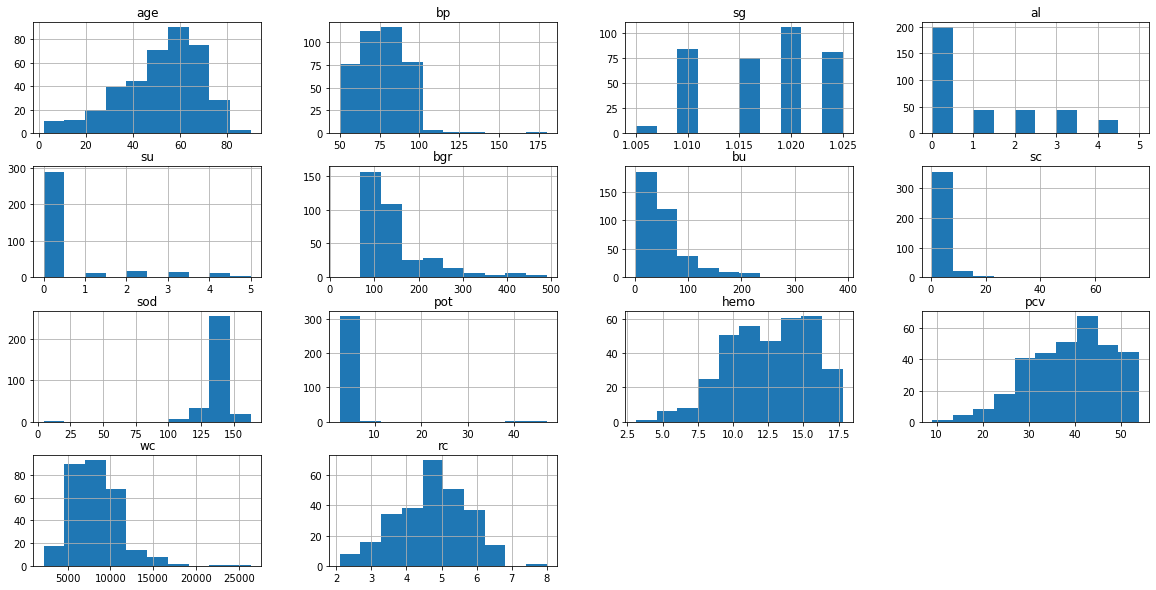

In [26]:
#Let's see the distribution of numerical values : Method 1
data[num_col].hist(figsize=(20,10))
plt.show()

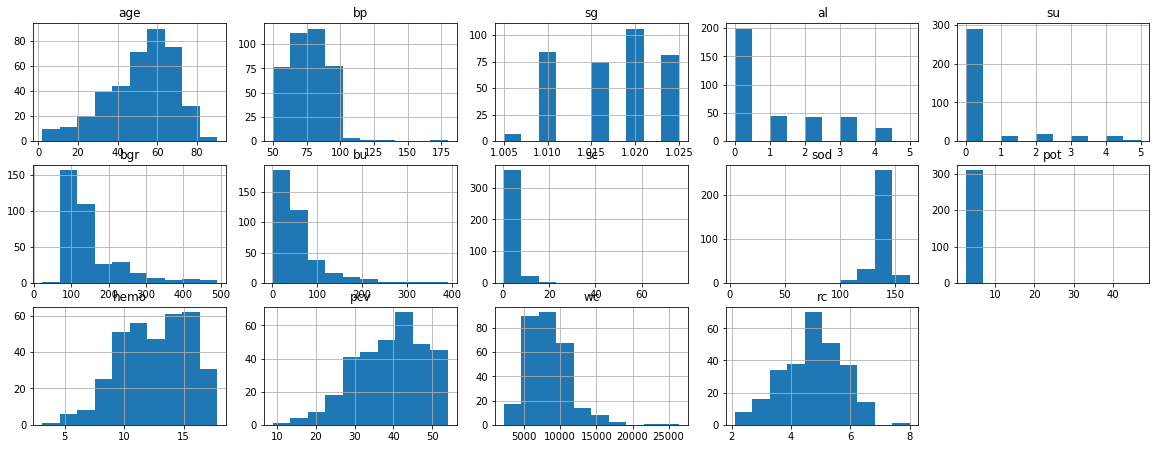

In [28]:
#Let's see the distribution of numerical values Method 2 : 
plt.figure(figsize=(20,10))
for i, feature in enumerate(num_col):
  plt.subplot(4,5, i+1)
  data[feature].hist()
  plt.title(feature)

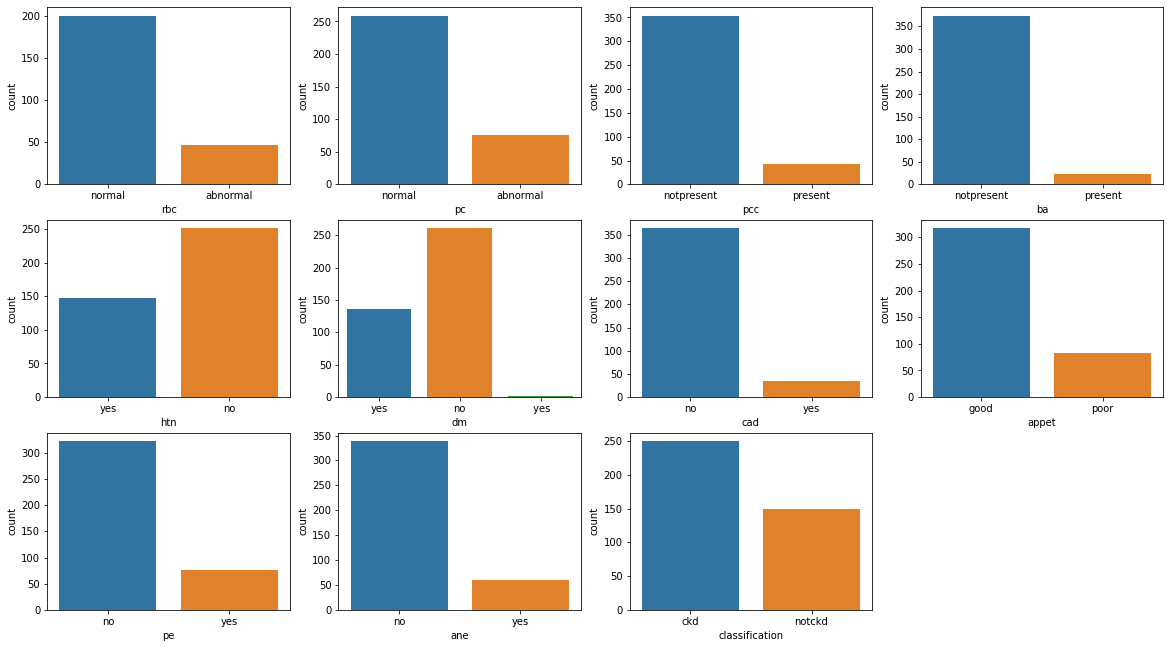

In [30]:
import warnings as wrg 
wrg.filterwarnings('ignore')
plt.figure(figsize=(20,15
                    ))
for i, feature in enumerate(cat_col):
  plt.subplot(4,4, i+1)
  sns.countplot(data[feature])
  #plt.title(feature)

###### 3. Management of the missing values.

In [31]:
import missingno as msno
msno.matrix(data)

ModuleNotFoundError: No module named 'missingno'